<a href="https://colab.research.google.com/github/Dhinesh-s2006/telecom-churn-predictor/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello World')

Hello World


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## READ DATA

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Customer_details.csv to Customer_details.csv


In [ ]:
df=pd.read_csv("Customer_details.csv")
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

# **1. Data Overview and Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
# Handle missing TotalCharges by assigning back (future-proof)
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# 3. Convert SeniorCitizen to categorical
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

# 4. Standardize categorical values (replace 'No internet service' and 'No phone service' with 'No')
replace_cols = [
    "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

for col in replace_cols:
    df[col] = df[col].replace({"No internet service": "No"})

df["MultipleLines"] = df["MultipleLines"].replace({"No phone service": "No"})

# 5. Drop customerID column
df = df.drop("customerID", axis=1)

# 6. Double-check for duplicates
print("Duplicates:", df.duplicated().sum())


Duplicates: 22


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm duplicates removed
print("Duplicates after:", df.duplicated().sum())

Duplicates after: 0


In [ ]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Final check
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Target distribution
print("\nChurn Distribution:\n", df["Churn"].value_counts(normalize=True))


Churn Distribution:
 Churn
No     0.735508
Yes    0.264492
Name: proportion, dtype: float64


# 2. Understanding of relationship among features

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2288.954490,2265.319449,18.80,411.15,1400.55,3801.7,8684.80


# Univariate Analysis


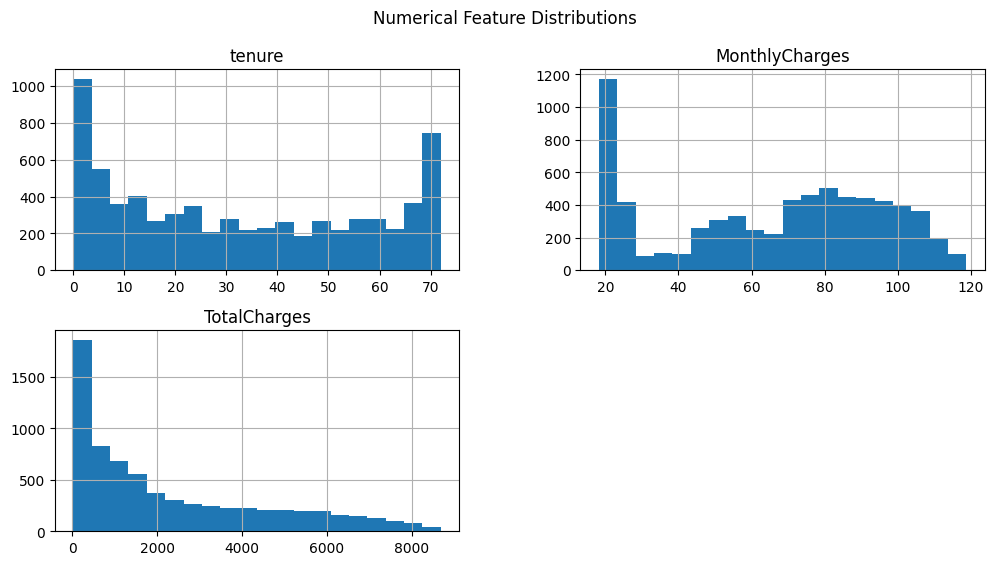

In [ ]:
# Numerical features distribution
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df[num_cols].hist(bins=20, figsize=(12, 6))
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Bivariate Analysis (Feature vs Churn)

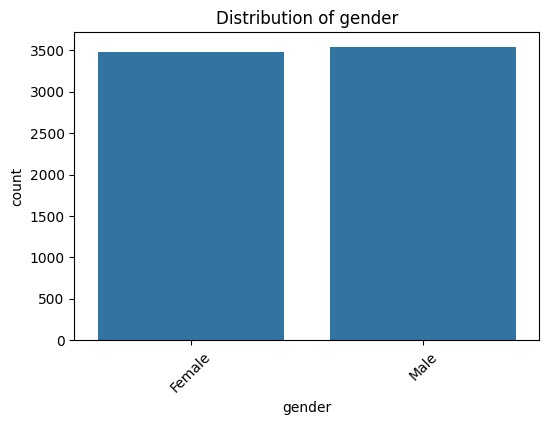

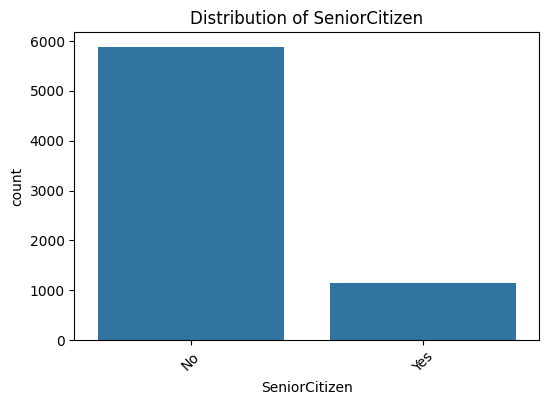

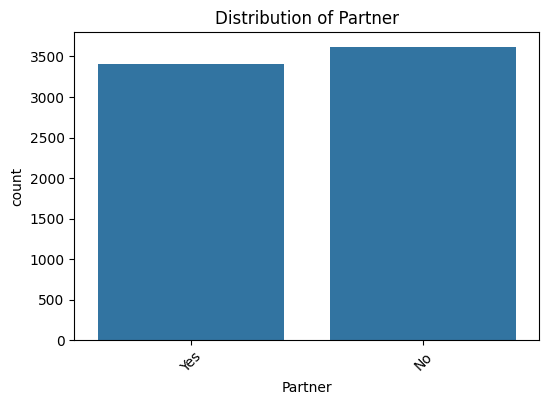

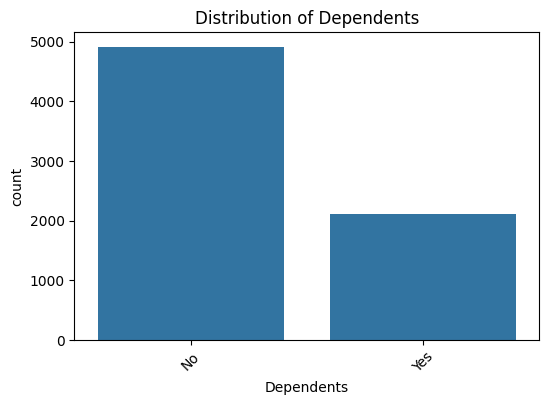

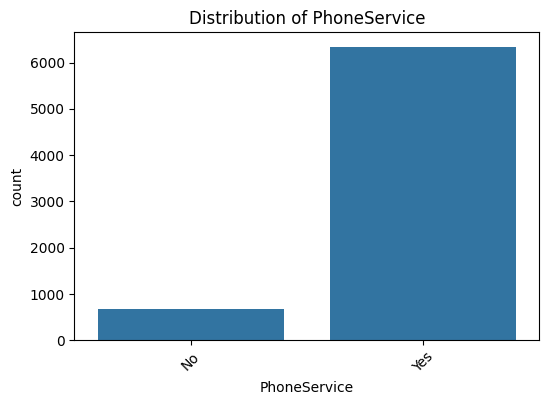

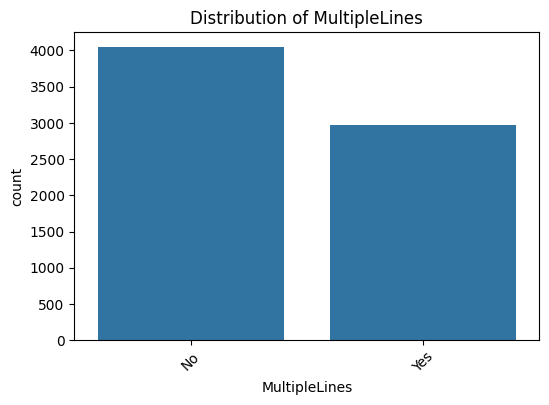

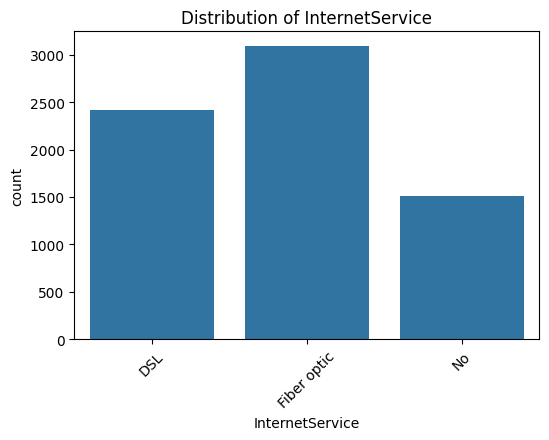

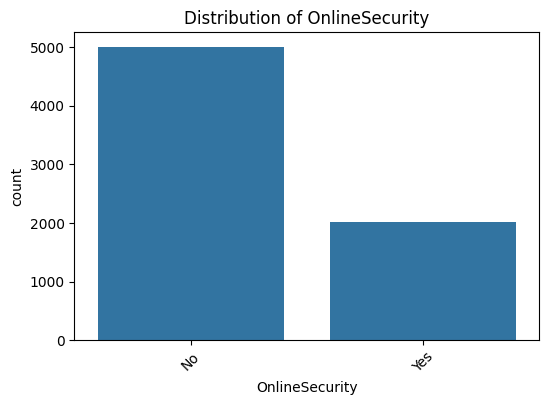

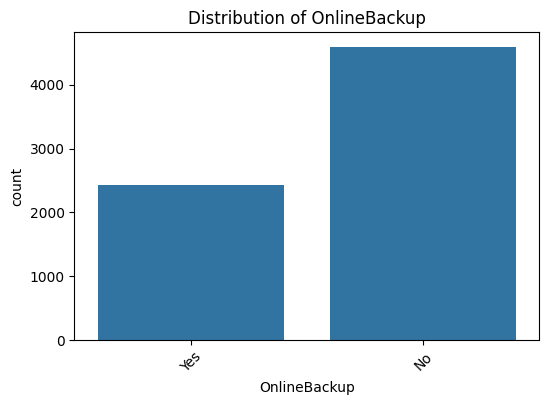

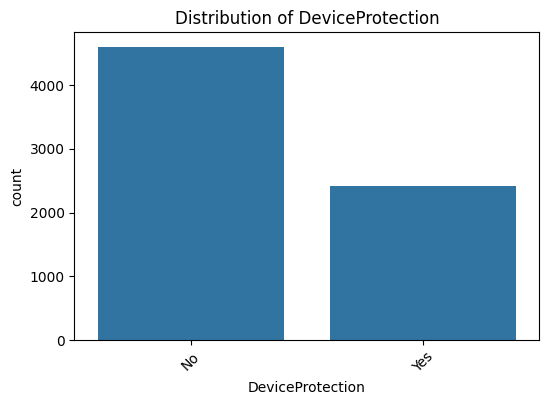

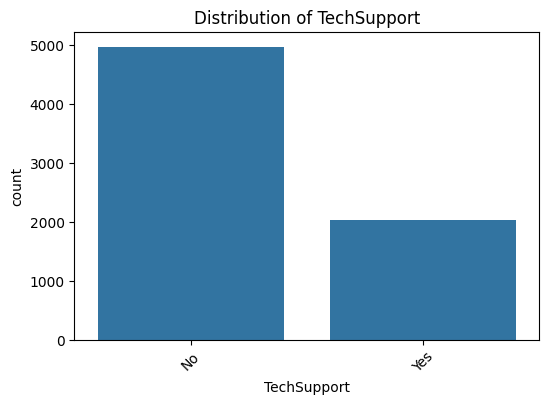

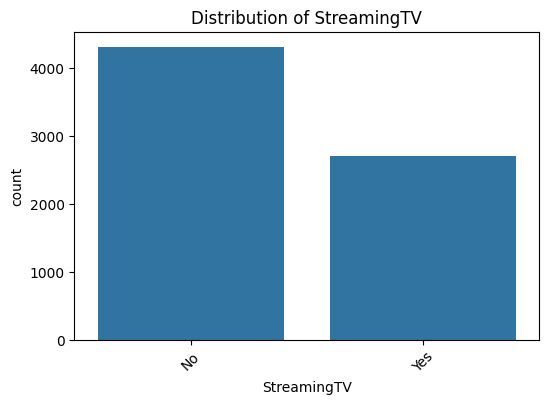

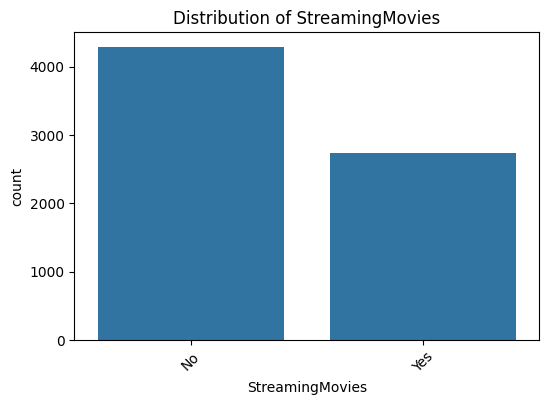

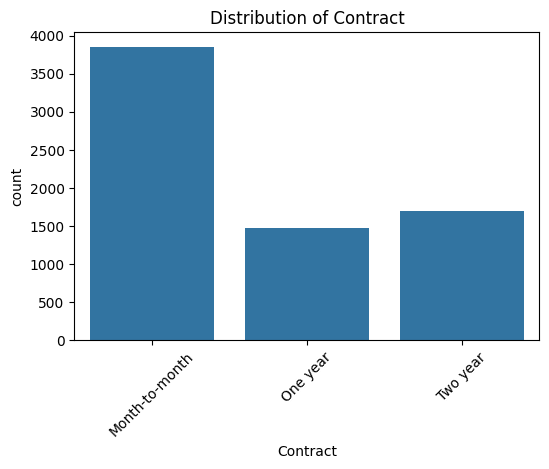

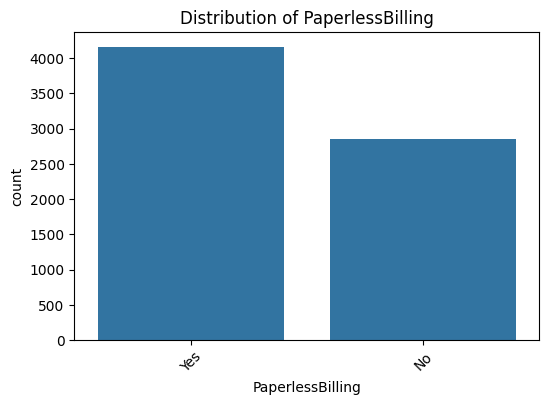

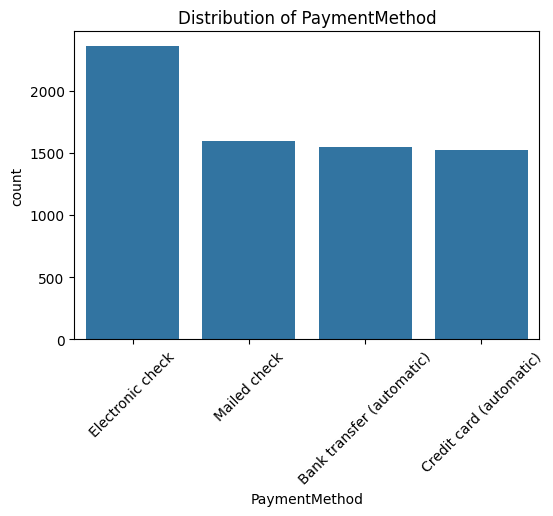

In [ ]:
# Categorical features distribution
cat_cols = [col for col in df.columns if df[col].dtype == "object" and col != "Churn"]

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

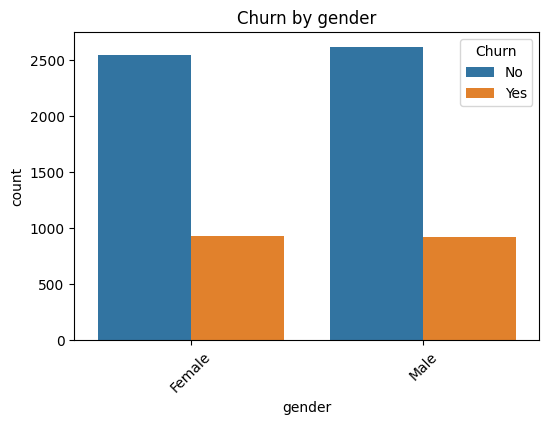

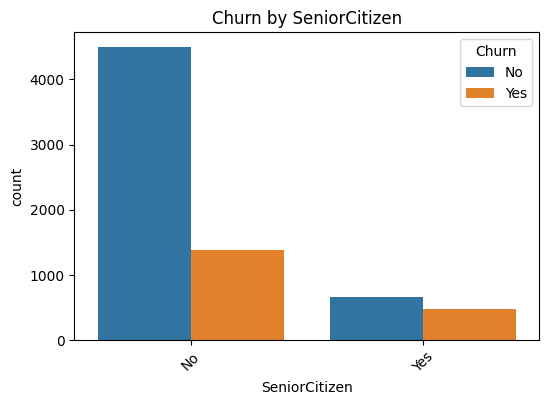

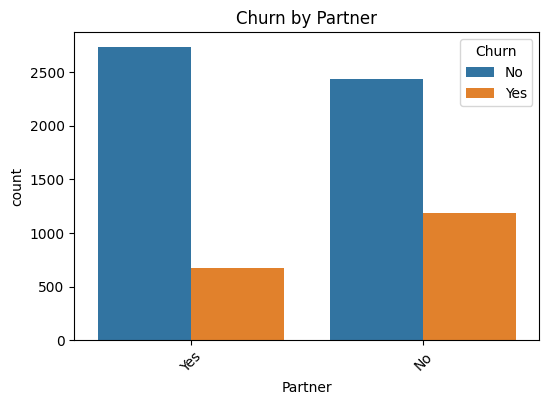

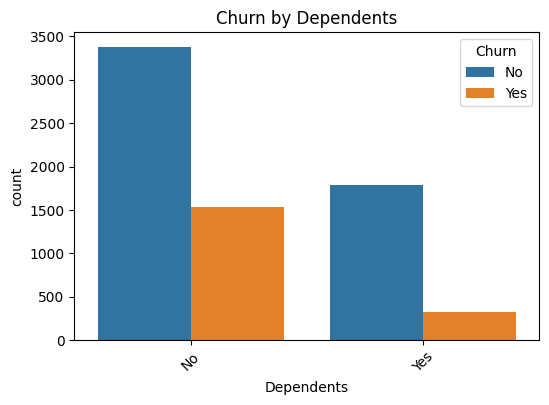

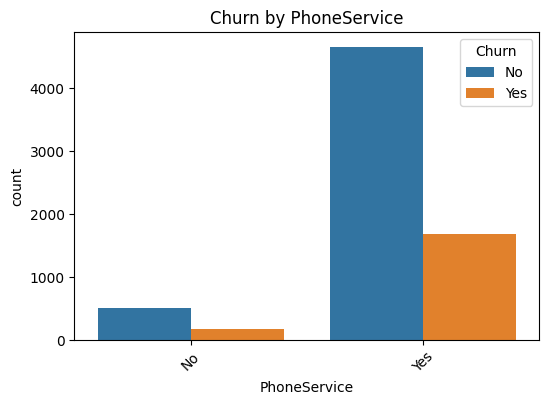

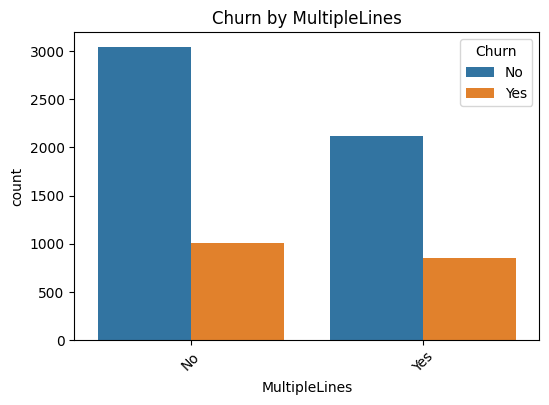

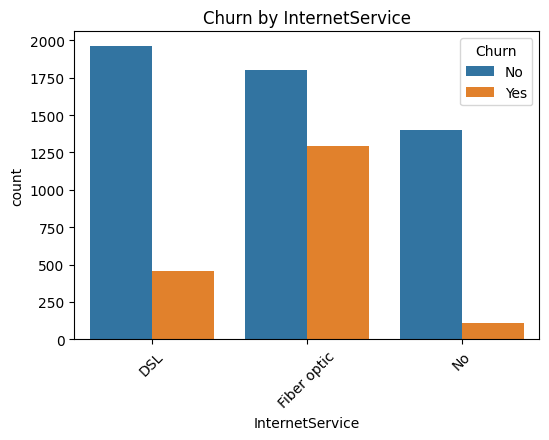

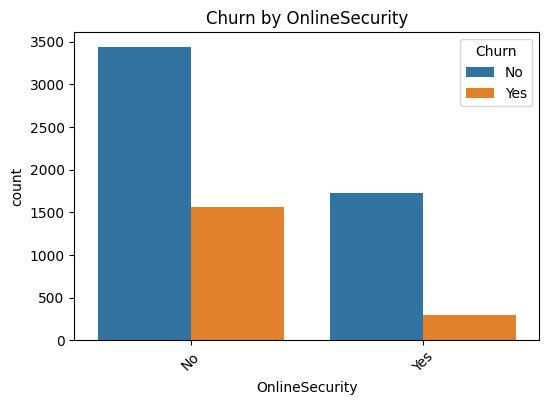

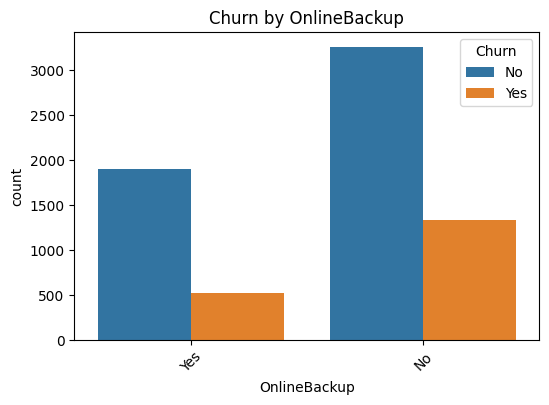

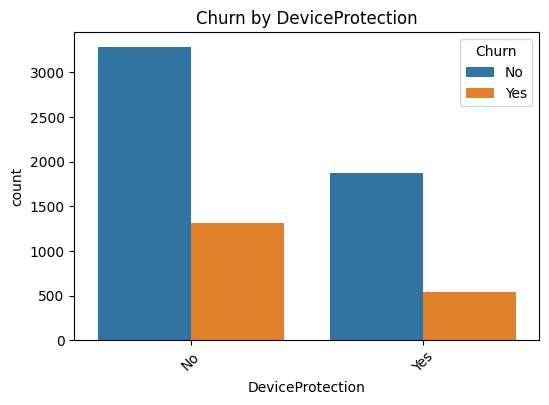

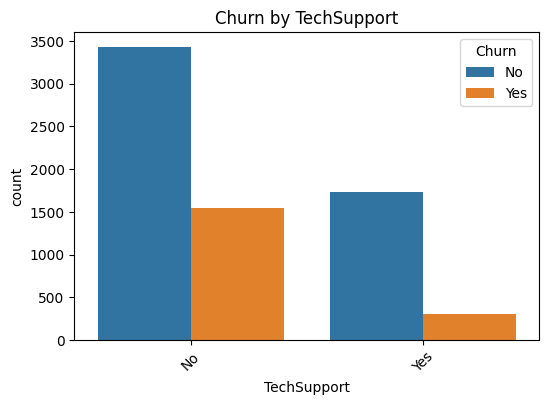

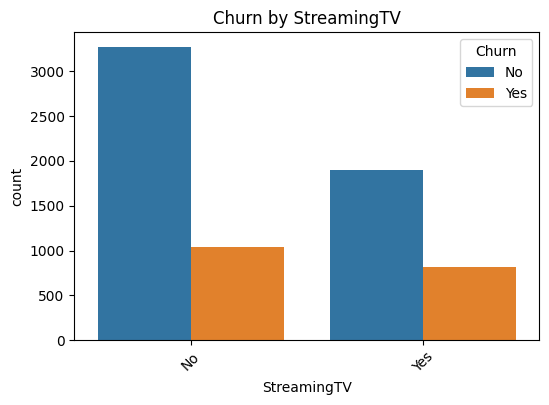

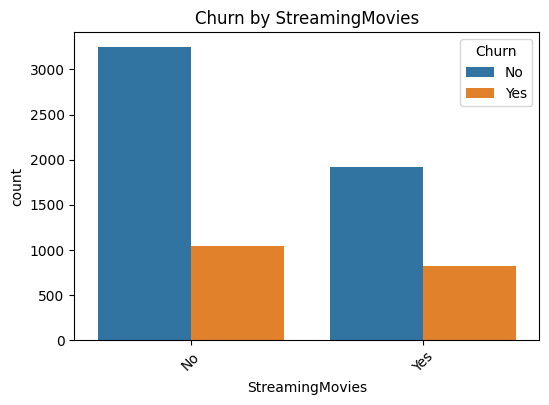

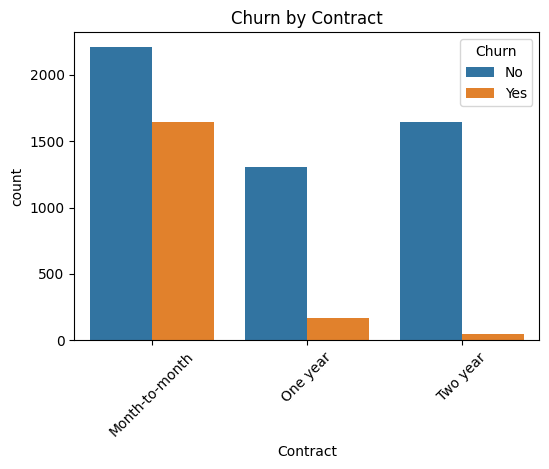

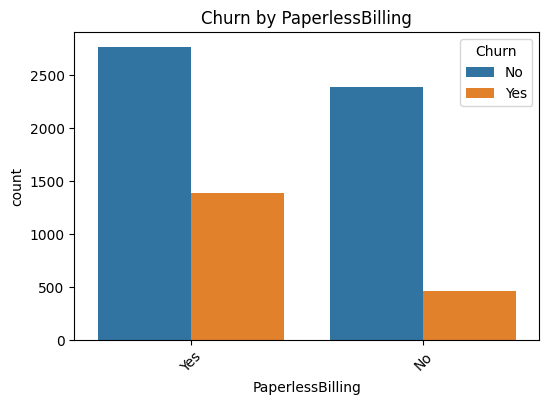

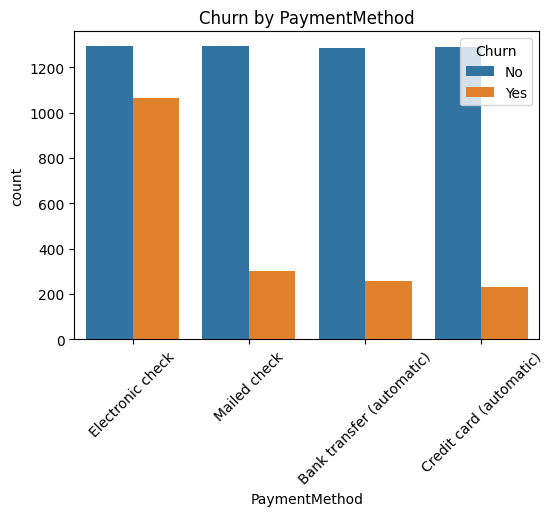

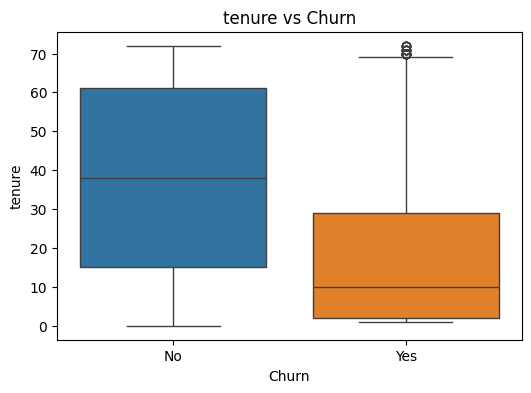

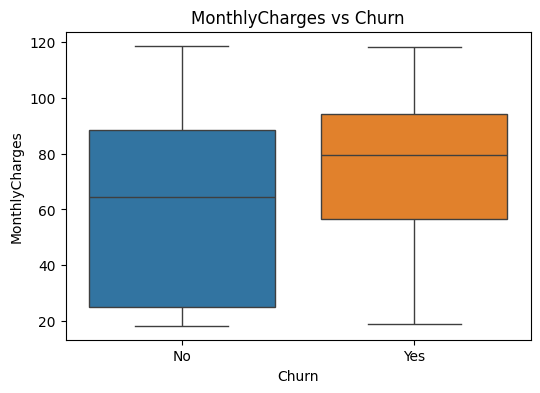

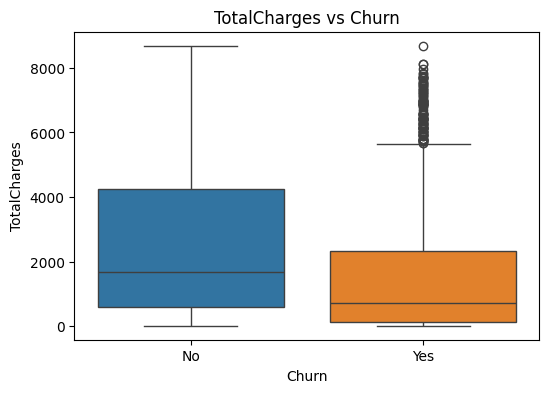

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Churn", y=col, data=df,hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.show()

# Multivariate Analysis

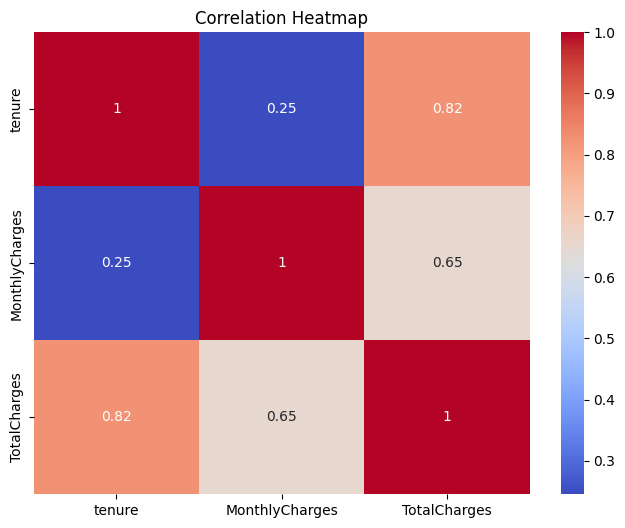

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

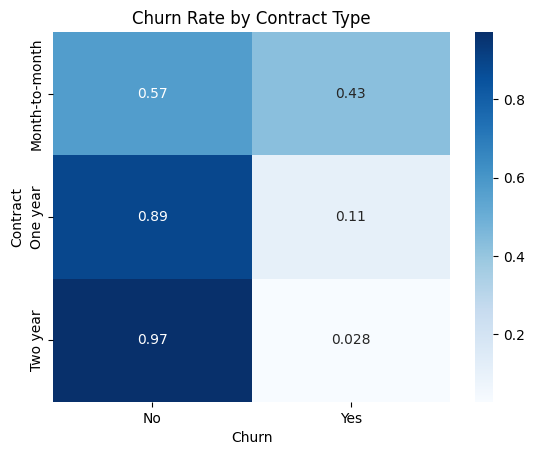

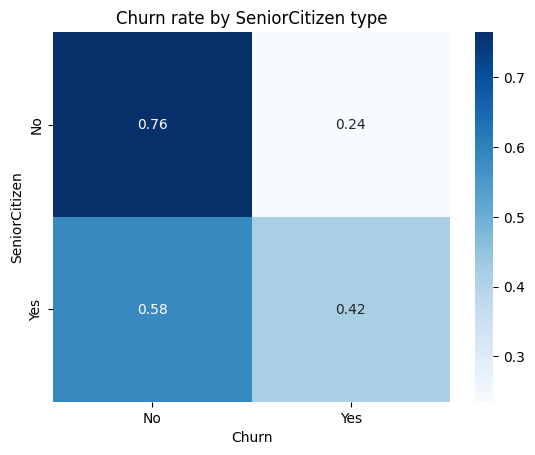

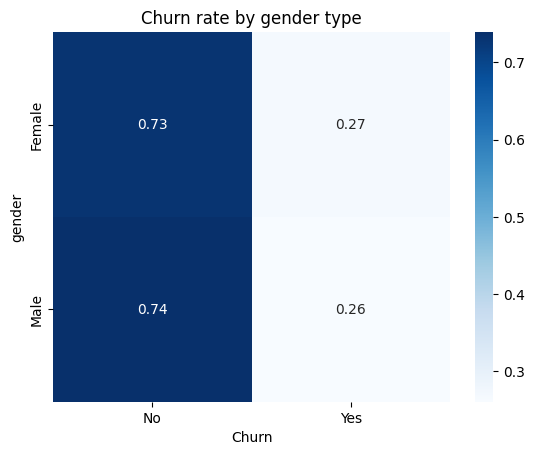

In [ ]:
# Cross-tab heatmap example: Contract vs Churn
ct = pd.crosstab(df["Contract"], df["Churn"], normalize="index")
sns.heatmap(ct, annot=True, cmap="Blues")
plt.title("Churn Rate by Contract Type")
plt.show()

ct = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index")
sns.heatmap(ct, annot=True, cmap="Blues")
plt.title("Churn rate by SeniorCitizen type")
plt.show()

ct = pd.crosstab(df["gender"], df["Churn"], normalize="index")
sns.heatmap(ct, annot=True, cmap="Blues")
plt.title("Churn rate by gender type")
plt.show()

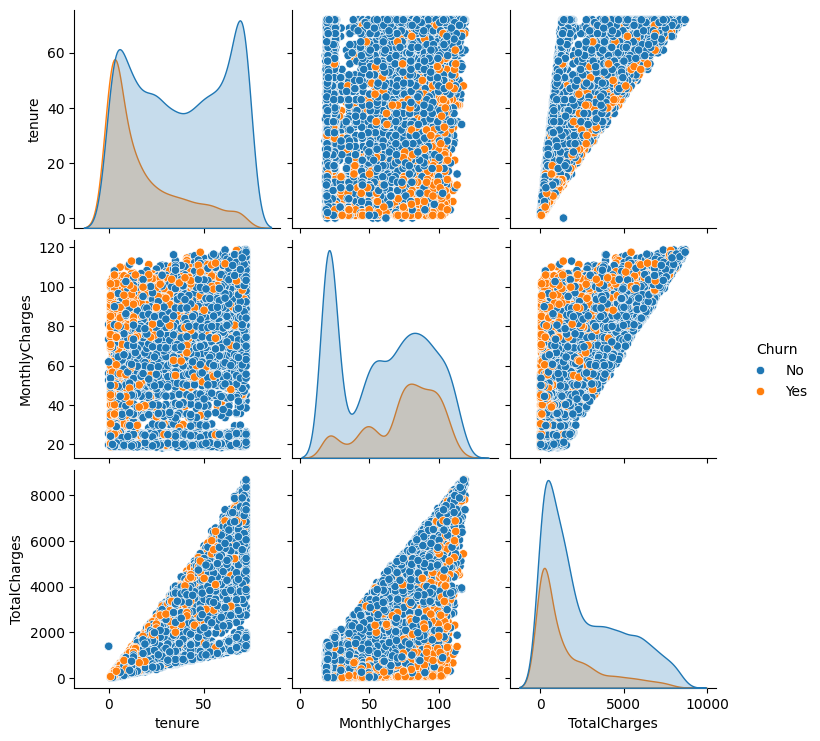

In [ ]:
sns.pairplot(df[num_cols + ["Churn"]], hue="Churn")
plt.show()


# Outlier Detection

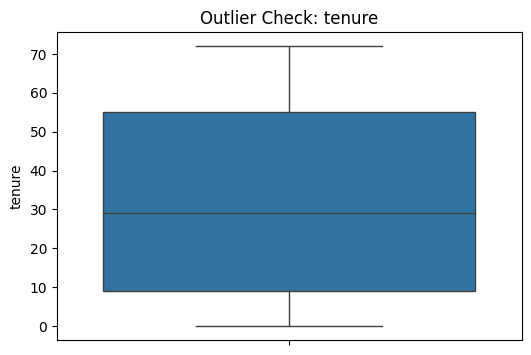

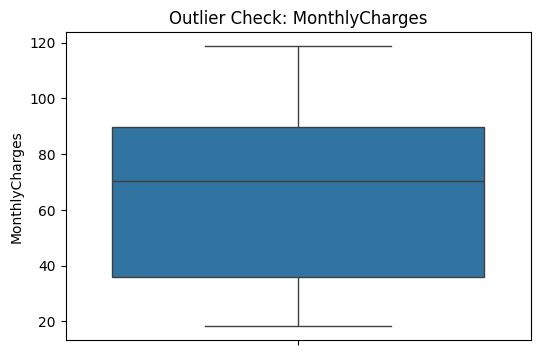

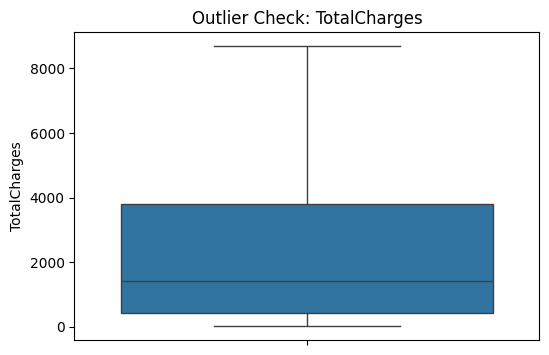

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=col, data=df)
    plt.title(f"Outlier Check: {col}")
    plt.show()

# Data Preprocessing

## 3. Feature construction

In [ ]:
# 1. Number of Services (count how many "Yes")
service_cols = [
    "MultipleLines","OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"
]
df["NumServices"] = df[service_cols].apply(lambda x: sum(x == "Yes"), axis=1)


# 2. Spending Level (Low/Medium/High)
df["SpendingLevel"] = pd.qcut(df["TotalCharges"], q=3, labels=["Low","Medium","High"])

# 3. Long Tenure + Low Charges (Loyalty feature)
df["LoyaltyFlag"] = ((df["tenure"] > 24) & (df["MonthlyCharges"] < df["MonthlyCharges"].median())).astype(int)


# 4. Define bins and labels for the tenure column

bins = [0, 12, 36, 60, 100] # 100 is just a safe upper limit
labels = ['New', 'Mid-Term', 'Loyal', 'Veteran']

# Create the binned feature using pandas.cut
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=bins,
    labels=labels,
    right=True, # right edge is inclusive
    include_lowest=True
)

# 5. Calculate the Expected Total Charges
df['Expected_Total_Charges'] = df['MonthlyCharges'] * df['tenure']

# Calculate the difference (Deviation)
df['Charge_Deviation'] = df['TotalCharges'] - df['Expected_Total_Charges']

df['Charge_Deviation'] = np.where(df['tenure'] == 0, 0, df['Charge_Deviation'])

# Final check
df[["tenure","TenureGroup","NumServices"
                       ,"SpendingLevel","LoyaltyFlag","Charge_Deviation"]].head(20)

,tenure,TenureGroup,NumServices,SpendingLevel,LoyaltyFlag,Charge_Deviation
0,1,New,1,Low,0,0.00
1,34,Mid-Term,2,Medium,1,-46.80
2,2,New,2,Low,0,0.45
3,45,Loyal,3,Medium,1,-62.75
4,2,New,0,Low,0,10.25
5,8,New,4,Medium,0,23.30
6,22,Mid-Term,3,Medium,0,-10.80
7,10,New,1,Low,0,4.40
8,28,Mid-Term,5,High,0,111.65
9,62,Veteran,2,High,1,6.65


In [ ]:
print(df.shape)       # shows row x column count
print(df.columns)     # lists all column names
df.head()             # see first 5 rows


(7021, 26)
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'NumServices',
       'SpendingLevel', 'LoyaltyFlag', 'TenureGroup', 'Expected_Total_Charges',
       'Charge_Deviation'],
      dtype='object')


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NumServices,SpendingLevel,LoyaltyFlag,TenureGroup,Expected_Total_Charges,Charge_Deviation
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,Low,0,New,29.85,0.00
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2,Medium,1,Mid-Term,1936.30,-46.80
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2,Low,0,New,107.70,0.45
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,Medium,1,Loyal,1903.50,-62.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,Low,0,New,141.40,10.25


# 4. Hypothesis testing

In [ ]:
# Create contingency table
ct = pd.crosstab(df["Contract"], df["Churn"])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject H0 → Contract type affects Churn")
else:
    print("Fail to reject H0 → Contract type does not affect Churn")


Chi2: 1179.8029713383091
p-value: 6.442284610021268e-257
Reject H0 → Contract type affects Churn


In [ ]:
# Create contingency table
ct = pd.crosstab(df["StreamingTV"], df["Churn"])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)

print("Chi2:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject H0 → StreamingTV type affects Churn")
else:
    print("Fail to reject H0 → StreamingTV type does not affect Churn")

Chi2: 29.390937000658234
p-value: 5.915363528173139e-08
Reject H0 → StreamingTV type affects Churn


In [ ]:

# Split data
churned = df[df["Churn"]=="Yes"]["MonthlyCharges"]
not_churned = df[df["Churn"]=="No"]["MonthlyCharges"]

# t-test
t_stat, p_val = ttest_ind(churned, not_churned)

print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H0 → MonthlyCharges differs between churned and non-churned")
else:
    print("Fail to reject H0 → MonthlyCharges does not differ")


t-statistic: 16.61304853917108
p-value: 8.041921866099076e-61
Reject H0 → MonthlyCharges differs between churned and non-churned


In [ ]:
# Separate features by dtype
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges",
                       "NumServices", "LoyaltyFlag"]

categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents",
                        "PhoneService", "MultipleLines", "InternetService",
                        "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                        "TechSupport", "StreamingTV", "StreamingMovies",
                        "Contract", "PaperlessBilling", "PaymentMethod",
                        "TenureGroup", "SpendingLevel"]

print("=== CATEGORICAL FEATURES VS Churn (Chi-Square Test) ===")
for col in categorical_features:
    ct = pd.crosstab(df[col], df["Churn"])
    chi2, p, dof, expected = chi2_contingency(ct)
    result = "Significant" if p < 0.05 else "Not Significant"
    print(f"{col}: p-value={p:.4f} → {result}")

print("\n=== NUMERICAL FEATURES VS Churn (t-test) ===")
for col in numerical_features:
    churned = df[df["Churn"]=="Yes"][col]
    not_churned = df[df["Churn"]=="No"][col]

    t_stat, p_val = ttest_ind(churned, not_churned)
    result = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{col}: p-value={p_val:.4f} → {result}")


=== CATEGORICAL FEATURES VS Churn (Chi-Square Test) ===
gender: p-value=0.4795 → Not Significant
SeniorCitizen: p-value=0.0000 → Significant
Partner: p-value=0.0000 → Significant
Dependents: p-value=0.0000 → Significant
PhoneService: p-value=0.3665 → Not Significant
MultipleLines: p-value=0.0005 → Significant
InternetService: p-value=0.0000 → Significant
OnlineSecurity: p-value=0.0000 → Significant
OnlineBackup: p-value=0.0000 → Significant
DeviceProtection: p-value=0.0000 → Significant
TechSupport: p-value=0.0000 → Significant
StreamingTV: p-value=0.0000 → Significant
StreamingMovies: p-value=0.0000 → Significant
Contract: p-value=0.0000 → Significant
PaperlessBilling: p-value=0.0000 → Significant
PaymentMethod: p-value=0.0000 → Significant
TenureGroup: p-value=0.0000 → Significant
SpendingLevel: p-value=0.0000 → Significant

=== NUMERICAL FEATURES VS Churn (t-test) ===
tenure: p-value=0.0000 → Significant
MonthlyCharges: p-value=0.0000 → Significant
TotalCharges: p-value=0.0000 → Sig

# 5. Feature Selection

In [ ]:
#Dropping unwnated columns with the help of hypothesis testing
df=df.drop(columns=["gender","PhoneService"])

# 7. Implementing various proximity measures

In [ ]:
df["LoyaltyFlag"] = df["LoyaltyFlag"].map({0: "No", 1: "Yes"})

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from sklearn.preprocessing import StandardScaler

# Example: take first 5 rows
sample_df = df.head(5)

# --- 1. Select numerical features ---
num_features = ["tenure", "MonthlyCharges", "TotalCharges","NumServices"]

scaler = StandardScaler()
num_scaled = scaler.fit_transform(sample_df[num_features])

# Euclidean distance
euclidean = euclidean_distances(num_scaled)
print("Euclidean Distance:\n", euclidean)

# Manhattan distance
manhattan = manhattan_distances(num_scaled)
print("\nManhattan Distance:\n", manhattan)

# Cosine similarity\\
cosine_sim = cosine_similarity(num_scaled)
print("\nCosine Similarity:\n", cosine_sim)


Euclidean Distance:
 [[0.         3.53082223 1.99763189 3.80242551 3.11890685]
 [3.53082223 0.         2.67317797 1.55864033 3.42474117]
 [1.99763189 2.67317797 0.         3.29353351 2.31004804]
 [3.80242551 1.55864033 3.29353351 0.         4.67642645]
 [3.11890685 3.42474117 2.31004804 4.67642645 0.        ]]

Manhattan Distance:
 [[0.         6.83565515 2.86111386 7.28278518 4.13095552]
 [6.83565515 0.         3.97454129 2.68042222 6.65645939]
 [2.86111386 3.97454129 0.         6.09377398 3.23100301]
 [7.28278518 2.68042222 6.09377398 0.         9.22448155]
 [4.13095552 6.65645939 3.23100301 9.22448155 0.        ]]

Cosine Similarity:
 [[ 1.         -0.82795841  0.325831   -0.44587301  0.01371216]
 [-0.82795841  1.         -0.72900203  0.7733218  -0.40800838]
 [ 0.325831   -0.72900203  1.         -0.58802724  0.3210355 ]
 [-0.44587301  0.7733218  -0.58802724  1.         -0.87676853]
 [ 0.01371216 -0.40800838  0.3210355  -0.87676853  1.        ]]


In [ ]:
# --- 2. For categorical features ---
cat_features = [ "SeniorCitizen", "Partner", "Dependents",
                "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                "Contract", "PaperlessBilling", "PaymentMethod","SpendingLevel","LoyaltyFlag"]

cat_data = pd.get_dummies(sample_df[cat_features], drop_first=True)

# Hamming distance (proportion of mismatches)
hamming = np.zeros((len(cat_data), len(cat_data)))
for i in range(len(cat_data)):
    for j in range(len(cat_data)):
        hamming[i, j] = np.mean(cat_data.iloc[i] != cat_data.iloc[j])

print("\nHamming Distance (categorical):\n", hamming)

# Jaccard similarity
def jaccard_similarity(x, y):
    return np.sum((x & y)) / np.sum((x | y))

jaccard = np.zeros((len(cat_data), len(cat_data)))
for i in range(len(cat_data)):
    for j in range(len(cat_data)):
        jaccard[i, j] = jaccard_similarity(cat_data.iloc[i].astype(bool), cat_data.iloc[j].astype(bool))

print("\nJaccard Similarity (categorical):\n", jaccard)


Hamming Distance (categorical):
 [[0.         0.76923077 0.30769231 0.76923077 0.23076923]
 [0.76923077 0.         0.46153846 0.15384615 0.69230769]
 [0.30769231 0.46153846 0.         0.61538462 0.38461538]
 [0.76923077 0.15384615 0.61538462 0.         0.69230769]
 [0.23076923 0.69230769 0.38461538 0.69230769 0.        ]]

Jaccard Similarity (categorical):
 [[1.         0.         0.33333333 0.         0.4       ]
 [0.         1.         0.25       0.71428571 0.        ]
 [0.33333333 0.25       1.         0.11111111 0.16666667]
 [0.         0.71428571 0.11111111 1.         0.        ]
 [0.4        0.         0.16666667 0.         1.        ]]


# 8. Visualization

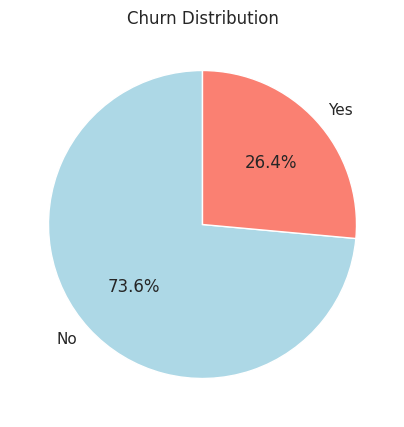

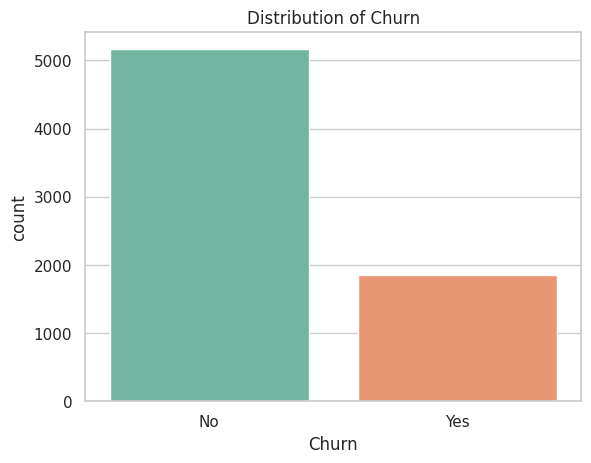

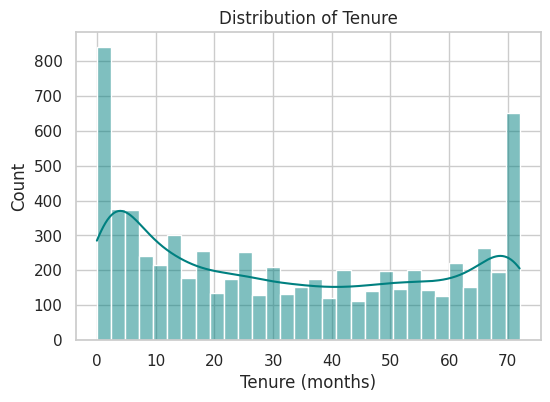

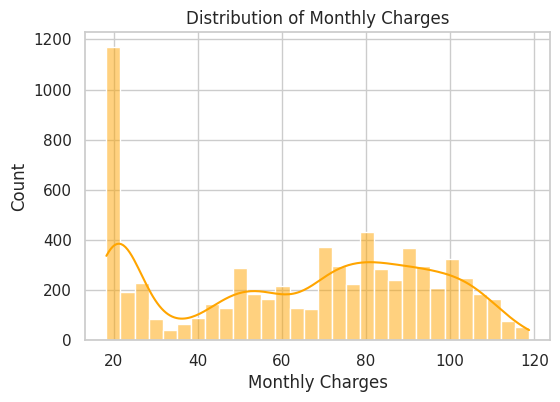

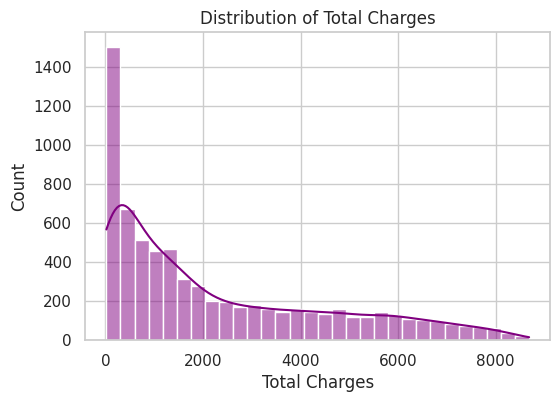

In [ ]:
# Set global style
sns.set(style="whitegrid", palette="muted")


# 1. Churn Distribution
plt.figure(figsize=(5,5))
df["Churn"].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['lightblue','salmon']
)
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()

#1. Distribution of Target (Churn)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df, palette="Set2", hue="Churn", legend=False)
plt.title("Distribution of Churn")
plt.show()

# 2. Tenure Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], bins=30, kde=True, color="teal")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.show()

# 3. Monthly Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="orange")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.show()

# 4. Total Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["TotalCharges"], bins=30, kde=True, color="purple")
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.show()




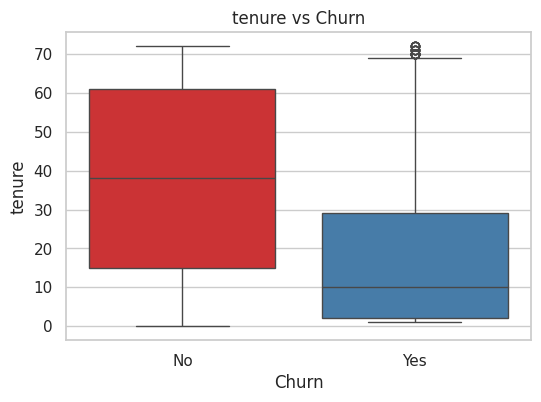

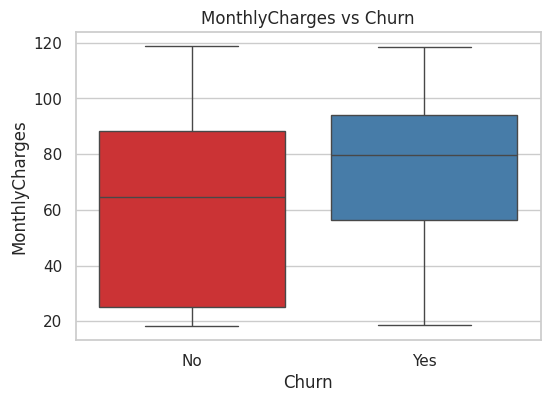

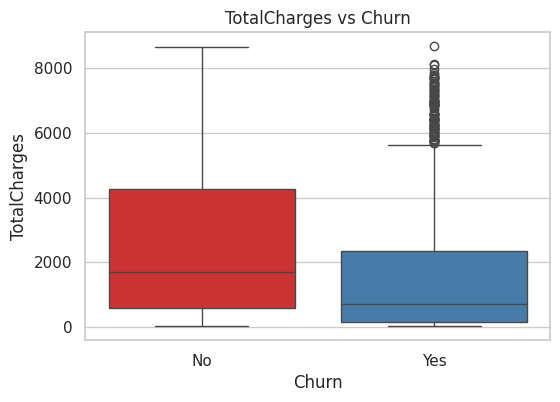

In [ ]:
#2. Numerical Features vs Churn (Boxplot)
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=df, palette="Set1",hue="Churn", legend=False)
    plt.title(f"{col} vs Churn")
    plt.show()


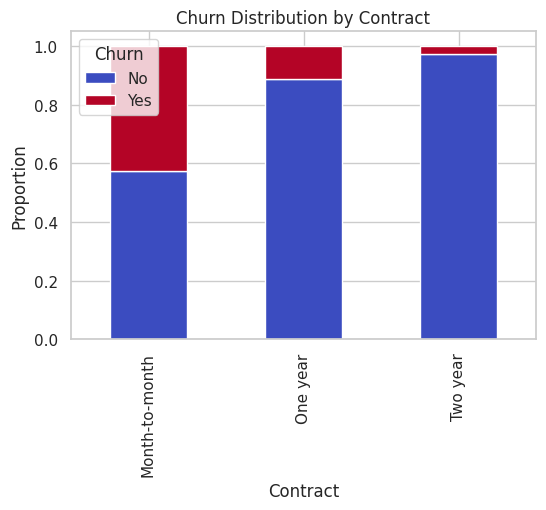

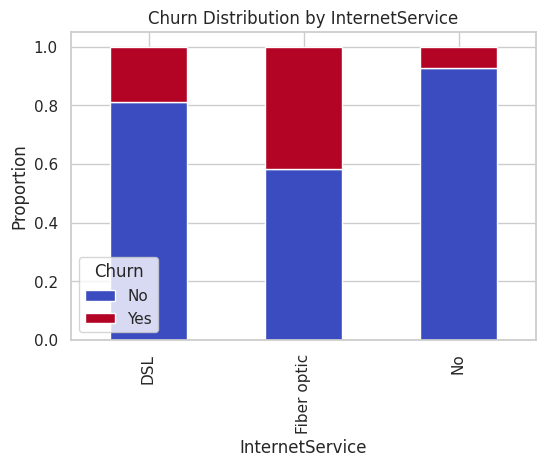

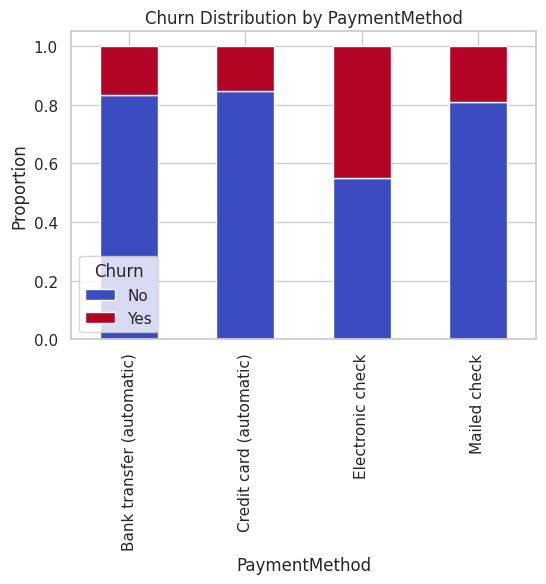

In [ ]:
#3. Categorical Features vs Churn (Stacked Barplot)
categorical_cols = ["Contract", "InternetService", "PaymentMethod"]

for col in categorical_cols:
    churn_crosstab = pd.crosstab(df[col], df["Churn"], normalize="index")
    churn_crosstab.plot(kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")
    plt.title(f"Churn Distribution by {col}")
    plt.ylabel("Proportion")
    plt.show()


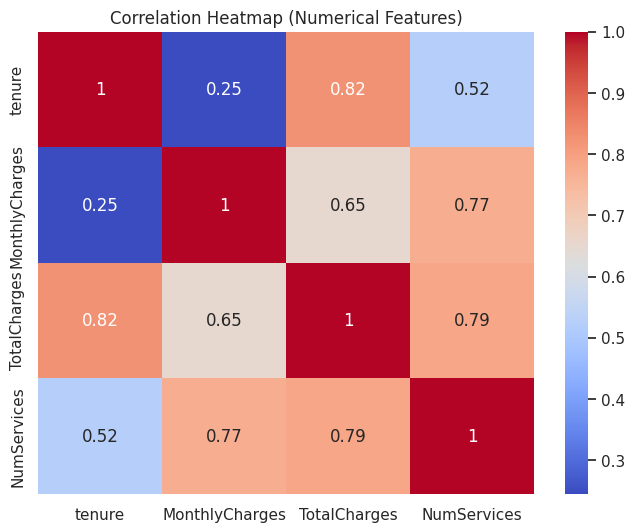

In [ ]:
#4. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(8,6))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges","NumServices"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


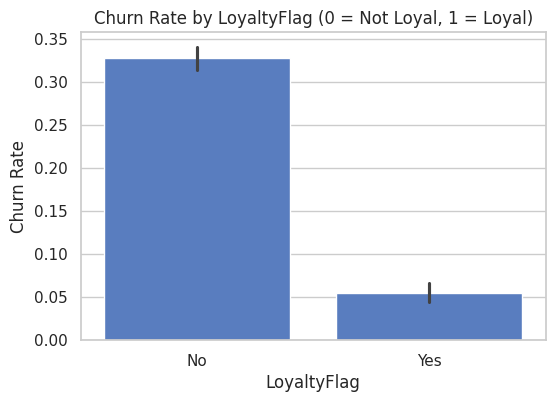

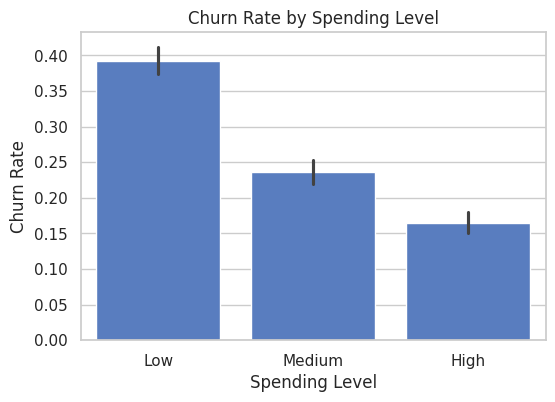

In [ ]:
# --- LoyaltyFlag vs Churn ---
plt.figure(figsize=(6,4))
sns.barplot(x="LoyaltyFlag", y="Churn", data=df.replace({"Churn": {"Yes": 1, "No": 0}}))
plt.title("Churn Rate by LoyaltyFlag (0 = Not Loyal, 1 = Loyal)")
plt.ylabel("Churn Rate")
plt.xlabel("LoyaltyFlag")
plt.show()

# --- SpendingLevel vs Churn ---
plt.figure(figsize=(6,4))
sns.barplot(x="SpendingLevel", y="Churn", data=df.replace({"Churn": {"Yes": 1, "No": 0}}),
            order=["Low","Medium","High"])  # ensures proper order
plt.title("Churn Rate by Spending Level")
plt.ylabel("Churn Rate")
plt.xlabel("Spending Level")
plt.show()



# 9. Curated dataset and inference

In [ ]:
df=df.drop(columns=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"])

In [ ]:
# --- Separate target ---
y = df["Churn"].map({"No": 0, "Yes": 1})
X = df.drop(columns=["Churn"]).copy()

# --- Binary columns ---
binary_cols = ["SeniorCitizen", "Partner", "Dependents", "PaperlessBilling","LoyaltyFlag"]
for col in binary_cols:
    X[col] = X[col].map({"No": 0, "Yes": 1})  # map Yes/No to 1/0

# --- Ordinal columns ---
X["SpendingLevel"] = X["SpendingLevel"].cat.codes  # Low=0, Medium=1, High=2
X["TenureGroup"] = X["TenureGroup"].cat.codes  # New=0, Mid-Term=1, Loyal=2, Veteran=3


# --- One-Hot Encoding (nominal) ---
one_hot_cols = ["Contract", "PaymentMethod"]
X_encoded = pd.get_dummies(X, columns=one_hot_cols, drop_first=True)

# --- Final numeric check ---
for col in X_encoded.columns:
    if X_encoded[col].dtype == bool:
        X_encoded[col] = X_encoded[col].astype(int)

X_encoded.head(20)


,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,NumServices,SpendingLevel,LoyaltyFlag,TenureGroup,Expected_Total_Charges,Charge_Deviation,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,1,0,0,0,29.85,0.00,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,2,1,1,1,1936.30,-46.80,1,0,0,0,1
2,0,0,0,2,1,53.85,108.15,2,0,0,0,107.70,0.45,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,3,1,1,2,1903.50,-62.75,1,0,0,0,0
4,0,0,0,2,1,70.70,151.65,0,0,0,0,141.40,10.25,0,0,0,1,0
5,0,0,0,8,1,99.65,820.50,4,1,0,0,797.20,23.30,0,0,0,1,0
6,0,0,1,22,1,89.10,1949.40,3,1,0,1,1960.20,-10.80,0,0,1,0,0
7,0,0,0,10,0,29.75,301.90,1,0,0,0,297.50,4.40,0,0,0,0,1
8,0,1,0,28,1,104.80,3046.05,5,2,0,1,2934.40,111.65,0,0,0,1,0
9,0,0,1,62,0,56.15,3487.95,2,2,1,3,3481.30,6.65,1,0,0,0,0


In [ ]:
X_encoded['MonthlyCharges'].mean()

np.float64(64.85189431704886)

In [ ]:
import pandas as pd
# Assuming your DataFrame is loaded as 'df'
# And the column is 'TOTAL_CHARGES'

# Define the quantile levels you want to calculate (e.g., quartiles)
quantile_levels_3_bins = [0.0, 1/3, 2/3, 1.0]
# Calculate the quantiles for the specific column
calculated_quantiles = X_encoded['TotalCharges'].quantile(quantile_levels_3_bins)

# Print the result
print(calculated_quantiles)

0.000000      18.80
0.333333     685.55
0.666667    2751.00
1.000000    8684.80
Name: TotalCharges, dtype: float64


# **Models**

In [ ]:
import seaborn as sns # Needed for heatmap
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# **Training and Splitting**

In [ ]:
smote = SMOTE(random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size BEFORE SMOTE: {X_train.shape}")

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Training set size AFTER SMOTE: {X_train_resampled.shape}")


# Standard Scaling and Feature Recombination
scaling_cols = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'Expected_Total_Charges', 'Charge_Deviation', 'NumServices'
]

# 1. Fit and Transform Scaling Data (FIT on Training)
scaler = StandardScaler()
X_train_scaled_only = scaler.fit_transform(X_train_resampled[scaling_cols])
# Convert scaled numeric array back to DataFrame
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_only,
    columns=scaling_cols,
    index=X_train_resampled.index # Corrected: Use index from resampled data
)

# 2. Recombine Scaled and Unscaled Features (Training Set)
X_train_non_scaled = X_train_resampled.drop(columns=scaling_cols, axis=1) # Corrected: Drop from resampled data
X_train_final = pd.concat(
    [X_train_scaled_df, X_train_non_scaled],
    axis=1
)

# 3. Transform the Test set (DO NOT RE-FIT!)
X_test_scaled_only = scaler.transform(X_test[scaling_cols])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_only,
    columns=scaling_cols,
    index=X_test.index
)
X_test_non_scaled = X_test.drop(columns=scaling_cols, axis=1)
X_test_final = pd.concat(
    [X_test_scaled_df, X_test_non_scaled],
    axis=1
)


Training set size BEFORE SMOTE: (5616, 18)
Training set size AFTER SMOTE: (8262, 18)


In [ ]:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges", "NumServices"]

covariance_matrix = X_train_final[numerical_cols].cov()
print("--- Covariance Matrix of Numerical Features ---")
print("Note: Values are not standardized, making interpretation difficult.")
print("\n" + "="*50)
print(covariance_matrix)
print("="*50 + "\n")

tenure_total_charges_cov = covariance_matrix.loc['tenure', 'TotalCharges']

--- Covariance Matrix of Numerical Features ---
Note: Values are not standardized, making interpretation difficult.

                  tenure  MonthlyCharges  TotalCharges  NumServices
tenure          1.000121        0.231856      0.860447     0.571949
MonthlyCharges  0.231856        1.000121      0.585337     0.729069
TotalCharges    0.860447        0.585337      1.000121     0.781089
NumServices     0.571949        0.729069      0.781089     1.000121



# **1. LOGISTIC** **REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
model_lr = LogisticRegression(
    penalty='l2',             # Standard regularization—safe and reliable for your data.
    C=1.0,                    # Inverse of regularization strength (default is usually fine initially).
    solver='liblinear',       # Fast and supports the 'l1' and 'l2' penalties.
    class_weight='balanced',  # CRITICAL: This adjusts weights to fix your low Recall (71%).
    random_state=42           # Ensures the results are reproducible every time you run the script.
)

# === FIX 1: TRAIN ON SCALED DATA ===
model_lr.fit(X_train_final, y_train_resampled)

# Predictions
# === FIX 2 & 3: PREDICT ON SCALED DATA ===
y_pred = model_lr.predict(X_test_final)
y_prob = model_lr.predict_proba(X_test_final)[:, 1]

# Evaluation
roc_auc = roc_auc_score(y_test, y_prob)

print("Logistic Regression AUC:", roc_auc * 100)
print("\nClassification Report of Logistic Regression :\n")
print(classification_report(y_test, y_pred))


Logistic Regression AUC: 80.83577949182357

Classification Report of Logistic Regression :

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.52      0.71      0.60       372

    accuracy                           0.75      1405
   macro avg       0.70      0.74      0.71      1405
weighted avg       0.78      0.75      0.76      1405



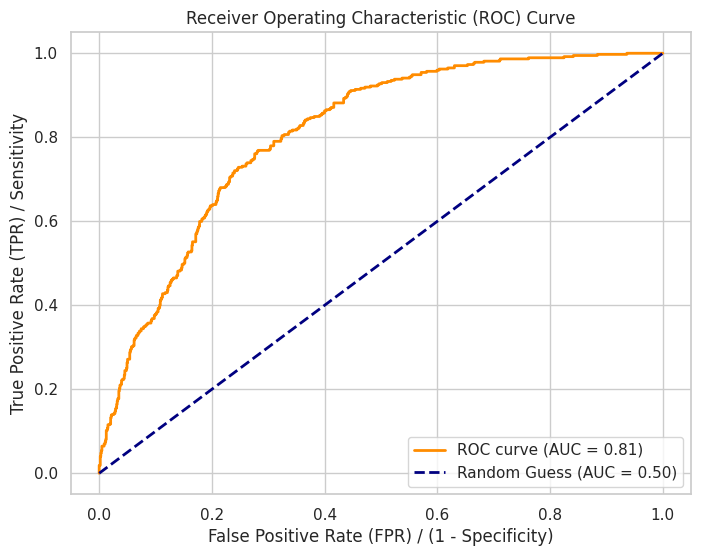


Interpretation Note:
The model's AUC is 0.81.


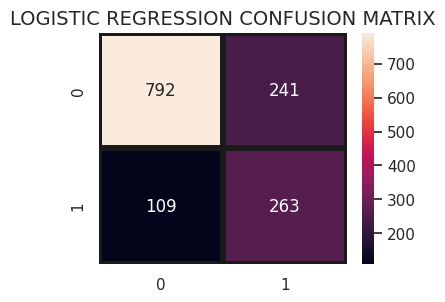

In [ ]:
# --- ROC Curve Visualization ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR) / (1 - Specificity)')
plt.ylabel('True Positive Rate (TPR) / Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Interpretation Note ---
print(f"\nInterpretation Note:")
print(f"The model's AUC is {roc_auc:.2f}.")

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

# **2. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_smote=KNeighborsClassifier(n_neighbors=15,p=2)
knn_smote.fit(X_train_final,y_train_resampled)

# Predictions for ROC (need probabilities)
# KNN supports predict_proba() which is required for ROC curve
knn_prob_smote = knn_smote.predict_proba(X_test_final)[:, 1]
knn_pred_smote = knn_smote.predict(X_test_final) # Get hard predictions for classification report

# 1. Calculate the AUC score
knn_roc_auc_smote = roc_auc_score(y_test, knn_prob_smote)

# 2. Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_knn_smote, tpr_knn_smote, thresholds_knn_smote = roc_curve(y_test, knn_prob_smote)

# Evaluation for KNN (SMOTE)
print("KNN (SMOTE) AUC:", knn_roc_auc_smote * 100)
print("\nClassification Report of KNN (SMOTE) :\n")
print(classification_report(y_test, knn_pred_smote))

KNN (SMOTE) AUC: 78.47263425246437

Classification Report of KNN (SMOTE) :

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1033
           1       0.48      0.68      0.56       372

    accuracy                           0.72      1405
   macro avg       0.67      0.71      0.68      1405
weighted avg       0.76      0.72      0.73      1405



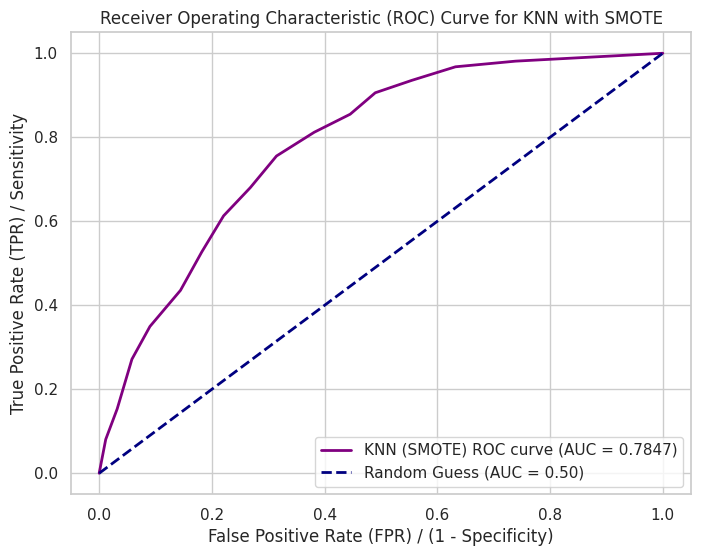


Interpretation Note:
The model's AUC is 0.78.


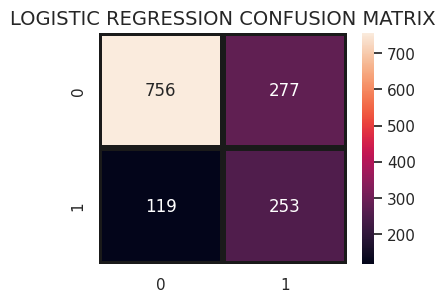

In [ ]:
# 3. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_knn_smote,
    tpr_knn_smote,
    color='purple',  # Using a distinct color for the SMOTE-trained KNN
    lw=2,
    label=f'KNN (SMOTE) ROC curve (AUC = {knn_roc_auc_smote:.4f})'
)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')

# 4. Add labels and title
plt.xlabel('False Positive Rate (FPR) / (1 - Specificity)')
plt.ylabel('True Positive Rate (TPR) / Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN with SMOTE')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# --- Interpretation Note ---
print(f"\nInterpretation Note:")
print(f"The model's AUC is {knn_roc_auc_smote:.2f}.")

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_pred_smote),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

# **OPTIMAL** **KNN**

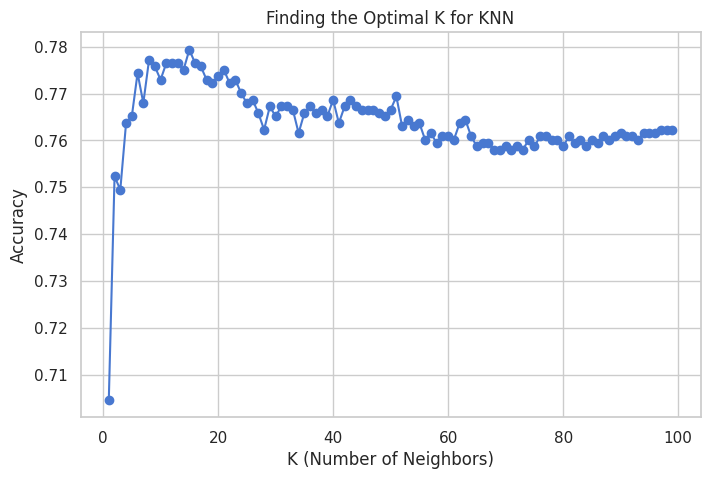

Best K value = 15 with Accuracy = 77.94%

Classification Report for Optimal KNN:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1033
           1       0.67      0.33      0.44       372

    accuracy                           0.78      1405
   macro avg       0.73      0.64      0.65      1405
weighted avg       0.76      0.78      0.75      1405



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

# Try different K values
k_values = range(1, 100)  # from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Finding the Optimal K for KNN")
plt.grid(True)
plt.show()

# Print best K
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K value = {best_k} with Accuracy = {max(accuracies)*100:.2f}%")

# Train KNN with the best K and print classification report
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(X_train, y_train)
y_pred_optimal_knn = optimal_knn.predict(X_test)
print("\nClassification Report for Optimal KNN:")
print(classification_report(y_test, y_pred_optimal_knn))

In [ ]:
# Test the Manhattan Distance (p=1) with the optimal K=63
optimal_knn_manhattan = KNeighborsClassifier(n_neighbors=best_k, p=1)
optimal_knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = optimal_knn_manhattan.predict(X_test)

# Check the F1-score for class 1
manhattan_report = classification_report(y_test, y_pred_manhattan)
# print the report and compare it to the p=2 (Euclidean) report
print("\nClassification Report for Optimal KNN with Manhattan Distance (p=1):")
print(manhattan_report)


Classification Report for Optimal KNN with Manhattan Distance (p=1):
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1033
           1       0.66      0.35      0.46       372

    accuracy                           0.78      1405
   macro avg       0.73      0.64      0.66      1405
weighted avg       0.76      0.78      0.75      1405



# **3. DECESION** **TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(
    max_depth=5,                       # Limits depth to prevent severe overfitting
    min_samples_leaf=50,               # Ensures leaves have enough samples
    class_weight='balanced',           # CRITICAL: Adjusts weights to improve Recall on Churn class
    random_state=42
)
model_dt.fit(X_train, y_train)

# Predictions for ROC (need probabilities)
# Decision Tree supports predict_proba()
dt_pred = model_dt.predict(X_test)
dt_prob = model_dt.predict_proba(X_test)[:, 1]

# 1. Calculate the AUC score
dt_roc_auc = roc_auc_score(y_test, dt_prob)

# 2. Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_prob) # Use dt_prob for ROC curve as well

print("Decesion Tree AUC:", dt_roc_auc * 100)
print("\nClassification Report of Decesion Tree :\n")
print(classification_report(y_test, dt_pred)) # Corrected to use dt_pred
print("Threshold: ",thresholds_dt)


Decesion Tree AUC: 82.26118727164851

Classification Report of Decesion Tree :

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.78      0.60       372

    accuracy                           0.72      1405
   macro avg       0.69      0.74      0.69      1405
weighted avg       0.79      0.72      0.74      1405

Threshold:  [       inf 0.93865031 0.81982325 0.74484536 0.70868996 0.59687906
 0.54930388 0.50669242 0.45175387 0.4449196  0.41295547 0.39097104
 0.31169965 0.26811237 0.24657534 0.23340961 0.14011906 0.13829467
 0.13174512 0.11535562 0.10789845 0.03986451 0.02455662 0.00452489
 0.        ]


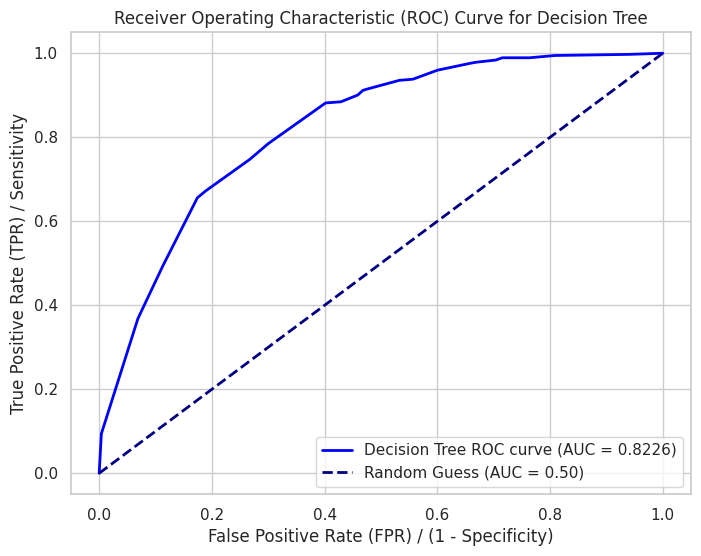


Interpretation Note:
The model's AUC is 0.82.


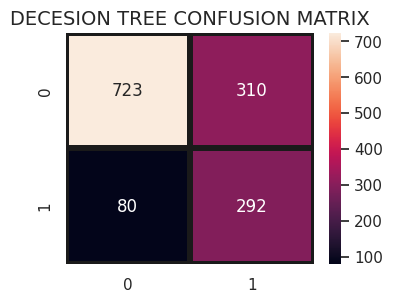

In [ ]:
# 3. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_dt,
    tpr_dt,
    color='blue',  # Using a distinct color
    lw=2,
    label=f'Decision Tree ROC curve (AUC = {dt_roc_auc:.4f})'
)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')

# 4. Add labels and title
plt.xlabel('False Positive Rate (FPR) / (1 - Specificity)')
plt.ylabel('True Positive Rate (TPR) / Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# --- Interpretation Note ---
print(f"\nInterpretation Note:")
print(f"The model's AUC is {dt_roc_auc:.2f}.")

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("DECESION TREE CONFUSION MATRIX",fontsize=14)
plt.show()

# **ANN**

In [ ]:
#Dhinesh
#Artificial Neural Networks (ANN) / Deep Learning

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# --- 1. Model Configuration (Adjusted for Binary Classification) ---

# NOTE: Replace X_train.shape[1] with the actual number of features
# in your encoded Customer Churn dataset. Assuming X_train is available.
input_features = X_train_final.shape[1]

model_ann = Sequential([
    # Input Layer (using the correct number of features from your churn data)
    Input(shape=(input_features,)),

    # Hidden Layer 1
    Dense(128, activation='relu'),

    # Hidden Layer 2
    Dense(64, activation='relu'),

    # Output Layer for Binary Classification
    # Needs only 1 neuron and 'sigmoid' activation
    Dense(1, activation='sigmoid')
])

# 2. Compile the model (Adjusted for Binary Classification)
model_ann.compile(
    optimizer='adam',
    # Use 'binary_crossentropy' for a single-output sigmoid layer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- 3. Train the model ---
print("Starting ANN training")
model_ann.fit(
    X_train,
    y_train, # Changed from y_train to y_train_resampled
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)
print("ANN training complete on balanced data.")

# 4. Predictions on X_test
# Get prediction probabilities for the positive class (class 1)
ann_prob = model_ann.predict(X_test).ravel()
y_pred_ann = (ann_prob > 0.4).astype(int) # Convert probabilities to hard predictions at 0.5 threshold

# 5. Evaluation and Classification Report
print("\nANN Test Evaluation:")
loss, accuracy = model_ann.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report of ANN:\n")
print(classification_report(y_test, y_pred_ann))

Starting ANN training
ANN training complete on balanced data.
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

ANN Test Evaluation:
Test Accuracy: 55.37%

Classification Report of ANN:

              precision    recall  f1-score   support

           0       0.91      0.40      0.55      1033
           1       0.35      0.89      0.50       372

    accuracy                           0.53      1405
   macro avg       0.63      0.64      0.53      1405
weighted avg       0.76      0.53      0.54      1405



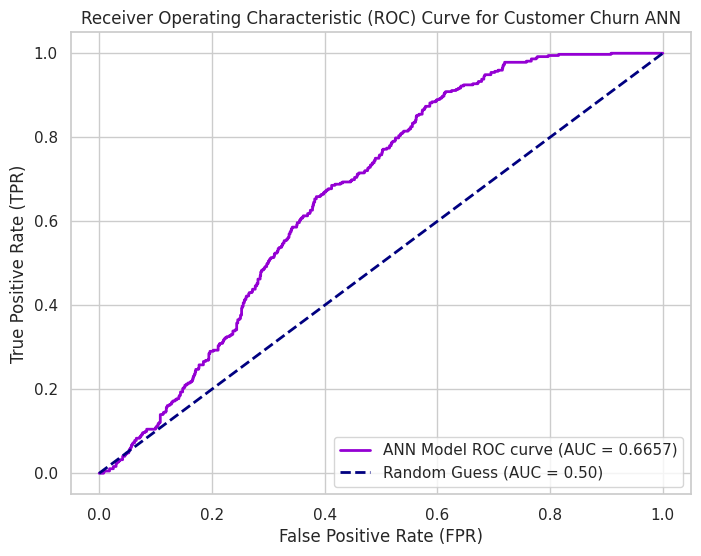

In [ ]:
# 6. ROC Curve Visualization (The requested output)

# Calculate the AUC score
ann_roc_auc = roc_auc_score(y_test, ann_prob)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, ann_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_ann,
    tpr_ann,
    color='darkviolet',
    lw=2,
    label=f'ANN Model ROC curve (AUC = {ann_roc_auc:.4f})'
)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')


plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Customer Churn ANN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


# -------------------------------
# STEP 2: Train SVM (with probability=True)
# -------------------------------
svm_model = SVC(
    kernel='linear',
    C=5,
    # Since we are using SMOTE on the data itself, we can often set class_weight=None,
    # but based on your performance, let's assume the high weight was needed.
    class_weight=None,
    random_state=42,
    probability=True # ESSENTIAL for the UI (predict_proba)
)

# Train using the fully scaled, recombined features and the resampled labels
svm_model.fit(X_train_final, y_train_resampled)

# -------------------------------
# STEP 3: Predictions and Evaluation
# -------------------------------
y_pred = svm_model.predict(X_test_final)
y_prob = svm_model.predict_proba(X_test_final)[:, 1]

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.7444839857651245

Confusion Matrix:
 [[789 244]
 [115 257]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.51      0.69      0.59       372

    accuracy                           0.74      1405
   macro avg       0.69      0.73      0.70      1405
weighted avg       0.78      0.74      0.75      1405




 SVM ROC AUC Score: 0.8067


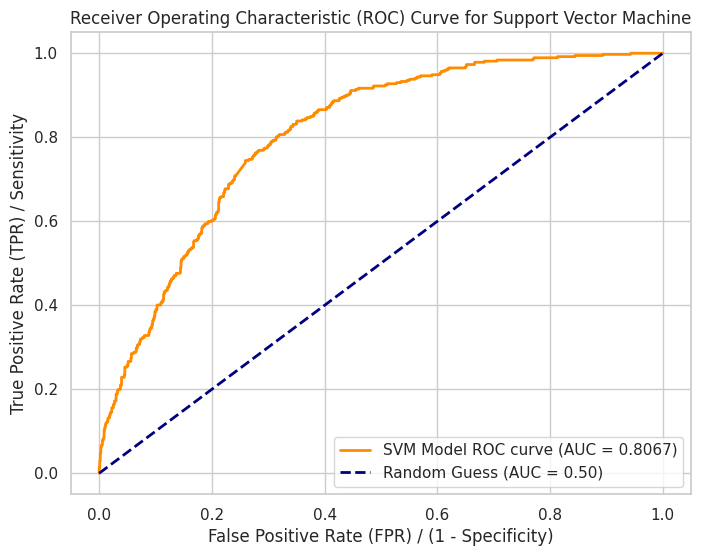

In [ ]:
# -------------------------------
# STEP 7: ROC Curve Visualization (New Code)
# -------------------------------

# Calculate the AUC score
svm_roc_auc = roc_auc_score(y_test, y_prob)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob)

# Print AUC score
print(f"\n SVM ROC AUC Score: {svm_roc_auc:.4f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_svm,
    tpr_svm,
    color='darkorange',  # Distinct color for SVM
    lw=2,
    label=f'SVM Model ROC curve (AUC = {svm_roc_auc:.4f})'
)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate (FPR) / (1 - Specificity)')
plt.ylabel('True Positive Rate (TPR) / Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for Support Vector Machine')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **For Website Purpose**

In [ ]:
import joblib # Needed for saving

# === FINAL DEPLOYMENT STEP: SAVE MODEL AND SCALER ===
joblib.dump(model_dt, 'churn_model.pkl')
#joblib.dump(scaler, 'preprocessor.pkl')
print("\nDeployment files (churn_model.pkl and preprocessor.pkl) saved successfully.")

# --- Download the files ---
from google.colab import files
files.download('churn_model.pkl')
#files.download('preprocessor.pkl')


Deployment files (churn_model.pkl and preprocessor.pkl) saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **END**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# --- 1. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2. Apply SMOTE on training set only ---
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# --- 3. Define tree-based models ---
tree_models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300, max_depth=6, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        use_label_encoder=False, eval_metric="logloss"
    )
}

# --- 4. Train and evaluate ---
results = {}

for name, model in tree_models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results[name] = (acc, auc)

    print(f"\n {name} Results")
    print("Accuracy:", round(acc, 3))
    print("ROC AUC:", round(auc, 3))
    print(classification_report(y_test, y_pred))

# --- 5. Summary Table ---
print("\n Tree-Based Model Comparison")
for name, (acc, auc) in results.items():
    print(f"{name:20s} | Accuracy: {acc:.3f} | ROC AUC: {auc:.3f}")


ValueError: Found input variables with inconsistent numbers of samples: [7021, 150]